In [126]:
import numpy as np
import pandas as pd # pandas is not required in codebase (only useful for development/visusalisation)
import matplotlib.pyplot as plt # visualisation
import seaborn as sns # visualisation

## Functions

In [138]:
# Note: in codebase, use get_world_dimension(world)
# Setup value map
def setup_value_map(world_dim=(9,9),
                    pad_dim=(8,8),
                    OUTER_MAP_VALUES=((-100, -100),(-100, -100))):
    map_dim = np.add(world_dim,np.multiply(pad_dim,2))

    # Initialise value map
    world_map = np.zeros(world_dim)
    value_map = np.pad(world_map, (pad_dim,pad_dim), 'constant', constant_values=OUTER_MAP_VALUES)
    reward_value_map = value_map
    rval_offset = pad_dim[0]-1

    # Initialise base map for reward mask matrix creation
    base_map = np.zeros(map_dim)
    
    return reward_value_map, rval_offset
    
# Update value map based on reward entities input
def update_value_map(rval, value_map, rval_offset, max_reward_spread=3):
    reward = rval[2]
    reward_discount = reward/abs(reward)
    reward_spread=0
    
    # Max reward spread shall be no greater than the dimension of the map
    # (mask matrices of +1 or -1 are applied in additive layers that correspond to the magnitude of the reward value)
    max_reward_spread = min(max_reward_spread, 9-1)
    
    if reward > 0:
        # positive reward value
        for i, value in enumerate(range(0, reward, 1)):
            if i <= max_reward_spread:
                reward_spread = i
            xstart= rval[1] + rval_offset - reward_spread
            xend = rval[1] + rval_offset + 1 + reward_spread
            ystart = rval[0] + rval_offset - reward_spread
            yend = rval[0] + rval_offset + 1 + reward_spread

            value_map[xstart:xend,ystart:yend] = value_map[xstart:xend,ystart:yend] + reward_discount
            
    elif reward < 0:
        # negative reward value
        for i, value in enumerate(range(0, reward, -1)):
            if i <= max_reward_spread:
                reward_spread = i 
            xstart= rval[1] + rval_offset - reward_spread
            xend = rval[1] + rval_offset + 1 + reward_spread
            ystart = rval[0] + rval_offset - reward_spread
            yend = rval[0] + rval_offset + 1 + reward_spread

            value_map[xstart:xend,ystart:yend] = value_map[xstart:xend,ystart:yend] + reward_discount
            
    else:
        # Reward assigned is 0.
        pass

## Inputs

In [142]:
# Reward entities inputs (x, y, reward value)
reward_entities = {
    'bomb' : [5,6,-6],
    'ammo' : [2,2,6],
#     'ammo' : [3,8,6],
}

reward_entities


{'bomb': [5, 6, -6], 'ammo': [2, 2, 6]}

## Updating the value map

In [143]:
# Initialise value map
reward_value_map, rval_offset = setup_value_map()

# Updates value map based on reward entities input
for rval in reward_entities.values():
    update_value_map(rval, reward_value_map, rval_offset)

## Visualising the value map

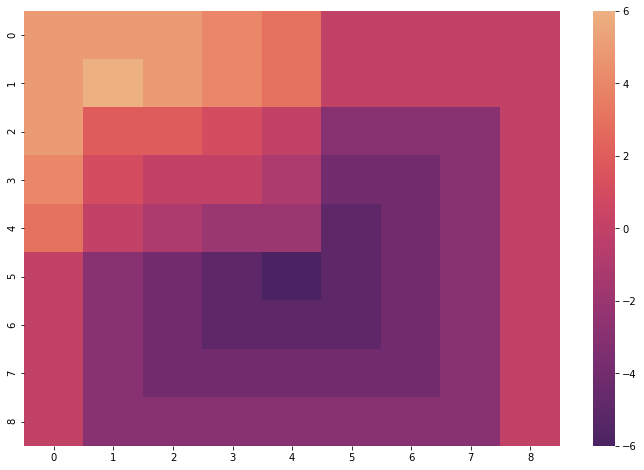

In [144]:
# Value map visualisation
df_map = pd.DataFrame(data=reward_value_map)
df_map_visual = df_map.iloc[7:18,7:18]
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(reward_value_map[8:17,8:17], cmap='flare_r')

In [116]:
# reward = rval[2]
# rdiscount = reward/abs(reward)
# for i, value in enumerate(range(0, reward, -1)):
#     xstart= rval[1] + rval_offset - i
#     xend = rval[1] + rval_offset + 1 + i
#     ystart = rval[0] + rval_offset - i
#     yend = rval[0] + rval_offset + 1 + i
    
#     reward_value_map[xstart:xend,ystart:yend] = reward_value_map[xstart:xend,ystart:yend] + rdiscount

In [117]:
# # Update value map based on reward entities input
# def update_value_map(rval, value_map, world_dim, OUTER_MAP_VALUES=((-100, -100),(-100, -100))):
#     '''
#     Updates the reward value map with mask matrix application, based on reward entity.
#     Returns a numpy array representing the updated reward value map.
#     '''
#     # Add map padding
#     pad_dim = (world_dim[0]-1,world_dim[1]-1)
#     value_map = np.pad(value_map, (pad_dim,pad_dim), 'constant', constant_values=OUTER_MAP_VALUES)
#     rval_offset = pad_dim[0]-1

#     reward = rval[2]
#     reward_discount = reward/abs(reward)
#     rval_offset = 8 # padding offset
    
#     if reward > 0:
#         # positive reward value
#         for i, value in enumerate(range(0, reward, 1)):
#             xstart= rval[1] + rval_offset - i
#             xend = rval[1] + rval_offset + 1 + i
#             ystart = rval[0] + rval_offset - i
#             yend = rval[0] + rval_offset + 1 + i

#             # Updates reward values in the map matrix.
#             value_map[xstart:xend,ystart:yend] = value_map[xstart:xend,ystart:yend] + reward_discount
            
#     elif reward < 0:
#         # negative reward value
#         for i, value in enumerate(range(0, reward, -1)):
#             xstart= rval[1] + rval_offset - i
#             xend = rval[1] + rval_offset + 1 + i
#             ystart = rval[0] + rval_offset - i
#             yend = rval[0] + rval_offset + 1 + i

#             # Updates reward values in the map matrix.
#             value_map[xstart:xend,ystart:yend] = value_map[xstart:xend,ystart:yend] + reward_discount
#     else:
#         # Reward assigned is 0.
#         pass

#     # Remove map padding
#     value_map = value_map[world_dim[0]-1:world_dim[0]+pad_dim[0],world_dim[0]-1:world_dim[0]+pad_dim[0]]

#     return value_map

# def get_value_map(world, walls, game_objects, reward_map, pinch_points=None, use_default=True):
#     """
#     Returns a numpy array map representing the values

#     walls must be an array of (x,y) tuples

#     game objects must be an array of objects with the following schema:
#     {
#        loc: (x, y)
#        type: string
#     }

#     reward map must be a dictionary with the following schema
#     {
#        [ENTITY_TYPE]: number
#     }

#     pinch points must be an array of (x,y) tuples or is None (articulation points)

#     use_default is a boolean to represent whether we should use the default reward map
#     """

#     # TODO are there numpy helper functions to help with these logic?

#     # create 2D matrix filled with zeroes
#     value_map = np.zeros(get_world_dimension(world))

#     # replace all walls with -10
#     for wall in walls:
#         x, y = wall
#         value_map[y, x] = DEFAULT_REWARDS['wall']

#     # get score mask for all non-wall objects
#     for item in game_objects:
#         if use_default:
#             if item['type'] in reward_map:
#                 reward = reward_map[item['type']]
#             else:
#                 reward = DEFAULT_REWARDS[item['type']]
#         else:
#             if item['type'] not in reward_map:
#                 continue
#             else:
#                 reward = reward_map[item['type']]

#         reward_entity = [item['loc'][0], item['loc'][1], reward]
#         value_map = update_value_map(reward_entity, value_map)

#     # re-evaluate for pinch points
#     if pinch_points is not None:
#         for tile in pinch_points:
#             pinch_reward = DEFAULT_REWARDS['pinch']
#             if 'pinch' in reward_map:
#                 pinch_reward = reward_map['pinch']

#             reward_entity = [tile['loc'][0], tile['loc'][1], pinch_reward]
#             value_map = update_value_map(reward_entity, value_map)

#     return value_map